

# **Task 1**


In [ ]:
#Important dependencies for the environment
!pip install face_recognition opencv-python numpy matplotlib
!pip install  tensorflow fer

**Training the model on the provided data set**

In [1]:
#To Extract Files from the data set
import zipfile
import os

In [2]:
with zipfile.ZipFile("Data set.zip", "r") as zip_ref:
    zip_ref.extractall("/content/Data set")

# Verify extraction
print(os.listdir("/content/Data set"))

['Neymar.jpg', 'Messi.jfif', 'Ronaldinho.jpg', 'Benzema.jfif', 'Ronaldo.jpg', 'Kaka.jfif']


In [6]:
import numpy as np
import cv2
import os

In [7]:
import face_recognition
import os

# Define the path to your dataset
dataset_path = "/content/Data set"
known_face_encodings = []
known_face_names = []

# Encode faces and store them
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg") or filename.endswith(".jfif"):  # adjust extensions if needed
        image_path = os.path.join(dataset_path, filename)
        image = face_recognition.load_image_file(image_path)

        # Use the HOG-based model for CPU compatibility
        encodings = face_recognition.face_encodings(image)

        if encodings:
            encoding = encodings[0]
            known_face_encodings.append(encoding)
            name = os.path.splitext(filename)[0]
            known_face_names.append(name)

print("Encoding complete. Known faces:", known_face_names)


Encoding complete. Known faces: ['Neymar', 'Messi', 'Ronaldinho', 'Benzema', 'Ronaldo', 'Kaka']


**Run to load a test image**

In [8]:
test_image_path = "test.jpg"  # Replace with your test image path
test_image = face_recognition.load_image_file(test_image_path)

**Run to use webcam capture if available**


In [ ]:
# Initialize the webcam
video_capture = cv2.VideoCapture(0)

# Capture a frame from the webcam
ret, frame = video_capture.read()

# Release the webcam
video_capture.release()

# Check if the frame was captured successfully
if not ret or frame is None:
    print("Failed to capture image from webcam.")
else:
    test_image = frame

**Recognize faces in the test image**

In [9]:
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

if not face_locations:
  print("No faces found in the test image.")
else:
  # Loop through each face found in the test image
  for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
      name = "Unknown"

      # Calculate the shortest distance to find the best match
      face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
      best_match_index = np.argmin(face_distances)
      if matches[best_match_index]:
          name = known_face_names[best_match_index]

      # Draw a box around the face
      cv2.rectangle(test_image, (left, top), (right, bottom), (0, 0, 255), 2)

      # Draw a filled rectangle for the text background
      cv2.rectangle(test_image, (left, top - 50), (right, top), (0, 0, 255), cv2.FILLED)

      # Add the name text over the filled rectangle
      font_scale = 2
      cv2.putText(test_image, name, (left + 6, top - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), 2)

  print("Face recognition complete. Results:")
  print(name)

Face recognition complete. Results:
Ronaldo


**If Facial Recognition is successful**

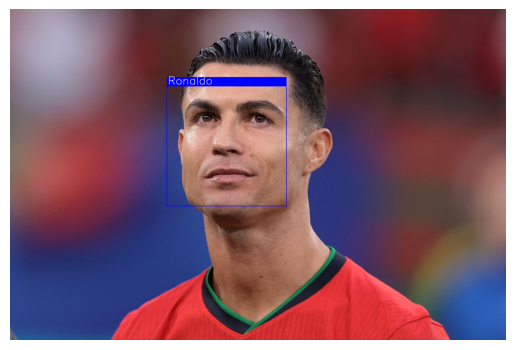

In [ ]:
# Display the results
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB for displaying
test_image_rgb = test_image[:, :, ::-1] if test_image.shape[-1] == 3 else test_image
plt.imshow(test_image)
plt.axis('off')
plt.show()

# **Task 2**

In [ ]:
import cv2
from fer import FER

# Initialize the FER detector
emotion_detector = FER()

# Initialize the webcam
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        break

    # Analyze the frame for emotions
    result = emotion_detector.detect_emotions(frame)

    # Draw the results on the frame
    for face in result:
        # Get the bounding box for the face
        x, y, w, h = face['box']

        # Get the dominant emotion
        dominant_emotion = max(face['emotions'], key=face['emotions'].get)
        emotion_probability = face['emotions'][dominant_emotion]

        # Draw a rectangle around the face and put the emotion label
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, f"{dominant_emotion} ({emotion_probability:.2f})",
                    (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    # Display the resulting frame
    cv2.imshow('Live Facial Expression Recognition', frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
video_capture.release()
cv2.destroyAllWindows()
